## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:\\Users\\Anushka\\Desktop\\DMWminiproject\\Dataset\\Dataset\\Train'
valid_path = 'C:\\Users\\Anushka\\Desktop\\DMWminiproject\\Dataset\\Dataset\\Test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('C:\\Users\\Anushka\\Desktop\\DMWminiproject\\Dataset\\Dataset\\Train\\*')

In [6]:
folders

['C:\\Users\\Anushka\\Desktop\\DMWminiproject\\Dataset\\Dataset\\Train\\Parasite',
 'C:\\Users\\Anushka\\Desktop\\DMWminiproject\\Dataset\\Dataset\\Train\\Uninfected']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
#from tensorflow.keras.layers import MaxPooling2D

### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\Anushka\\Desktop\\DMWminiproject\\Dataset\\Dataset\\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [14]:
training_set

In [15]:
test_set = test_datagen.flow_from_directory('C:\\Users\\Anushka\\Desktop\\DMWminiproject\\Dataset\\Dataset\\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Anushka\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
13/13 [==============================] - 276s 21s/step - loss: 1.8441 - accuracy: 0.5096 - val_loss: 1.6842 - val_accuracy: 0.3582
Epoch 2/4
13/13 [==============================] - 272s 21s/step - loss: 0.9254 - accuracy: 0.5962 - val_loss: 0.7175 - val_accuracy: 0.6194
Epoch 3/4
13/13 [==============================] - 270s 21s/step - loss: 0.5889 - accuracy: 0.7332 - val_loss: 0.4971 - val_accuracy: 0.7164
Epoch 4/4
13/13 [==============================] - 269s 21s/step - loss: 0.4131 - accuracy: 0.8125 - val_loss: 0.4437 - val_accuracy: 0.7985


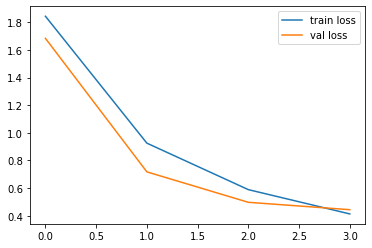

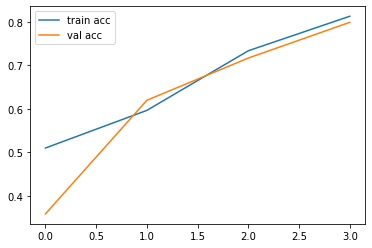

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [19]:

y_pred = model.predict(test_set)


In [20]:
y_pred

array([[0.98034865, 0.01965131],
       [0.6970859 , 0.30291402],
       [0.2165235 , 0.78347653],
       [0.264805  , 0.73519504],
       [0.99160504, 0.0083949 ],
       [0.30036393, 0.6996361 ],
       [0.39502552, 0.6049745 ],
       [0.15708454, 0.8429155 ],
       [0.9045553 , 0.09544473],
       [0.9363013 , 0.06369874],
       [0.90685016, 0.0931498 ],
       [0.8011635 , 0.19883648],
       [0.8082703 , 0.19172974],
       [0.41412005, 0.5858799 ],
       [0.38861582, 0.6113842 ],
       [0.3300964 , 0.66990364],
       [0.7201788 , 0.27982125],
       [0.31278086, 0.6872191 ],
       [0.9805219 , 0.01947809],
       [0.24547389, 0.75452614],
       [0.98339844, 0.01660151],
       [0.81940687, 0.18059318],
       [0.15665755, 0.8433425 ],
       [0.9507808 , 0.04921918],
       [0.591994  , 0.408006  ],
       [0.16906877, 0.83093125],
       [0.4293342 , 0.5706658 ],
       [0.7089952 , 0.2910048 ],
       [0.33375582, 0.66624427],
       [0.3616126 , 0.63838744],
       [0.

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [2]:
y_pred

NameError: name 'array' is not defined

In [1]:
y_pred[0][0]

NameError: name 'y_pred' is not defined

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_vgg19.h5')

In [35]:
img=image.load_img('C:\\Users\\Anushka\\Desktop\\DMWminiproject\\Dataset\\Dataset\\Test\\Uninfected\\C3thin_original_IMG_20150608_162922_cell_211.png',target_size=(224,224))



In [36]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [37]:
x.shape

(224, 224, 3)

In [38]:
x=x/255

In [39]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [40]:
model.predict(img_data)

array([[0.9966853, 0.0033147]], dtype=float32)

In [41]:
a=np.argmax(model.predict(img_data), axis=1)
print(a)

[0]


In [32]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected


In [33]:
from flask import Flask, flash, request, redirect, url_for, render_template
import urllib.request
import os
from werkzeug.utils import secure_filename
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
 
app = Flask(__name__)

UPLOAD_FOLDER = 'C:\\Users\\Anushka\\Desktop\\DMWminiproject\\static\\uploads'
app.secret_key = "secret key"
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
app.config['MAX_CONTENT_LENGTH'] = 16 * 1024 * 1024
 
ALLOWED_EXTENSIONS = set(['png', 'jpg', 'jpeg', 'gif'])







def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
   

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
    x = preprocess_input(x)

    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
        preds="The Person is Infected With Pneumonia"
    else:
        preds="The Person is not Infected With Pneumonia"
    
    
    return preds


 
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS
     
 
# Model saved with Keras model.save()
MODEL_PATH ='model_vgg19.h5'

# Load your trained model
model = load_model(MODEL_PATH)


@app.route('/')
def home():
    return render_template('index.html')
 
@app.route('/predict', methods=['POST'])
def upload():
    if 'file' not in request.files:
        flash('No file part')
        return redirect(request.url)
    file = request.files['file']
    if file.filename == '':
        flash('No image selected for uploading')
        return redirect(request.url)
    if file and allowed_file(file.filename):
        filename = secure_filename(file.filename)
        file.save(os.path.join(app.config['UPLOAD_FOLDER'], filename))
        #print('upload_image filename: ' + filename)
        fullpaths = ['C:\\Users\\Anushka\\Desktop\\DMWminiproject\\static\\uploads\\{}'.format(filename)]
        #print(fullpaths)
        
        preds = model_predict(fullpaths[0], model)
        result=preds
        return result
    
            
if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Sep/2021 15:25:32] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Sep/2021 15:25:43] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [05/Sep/2021 15:26:06] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [05/Sep/2021 15:26:14] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [05/Sep/2021 15:26:21] "POST /predict HTTP/1.1" 200 -
